In [1]:
from PIL import Image
import torch
from torchvision.transforms import transforms
from torch.utils.data import Dataset
import pandas as pd
import numpy as np
import os
from IPython.display import display

In [2]:
device = "cuda"if torch.cuda.is_available() else "cpu"
print("Device using:", device)

Device using: cuda


In [3]:
class ImageDataset(Dataset):
    def __init__(self,data_dir,transform=None,maxdata=100):
        super().__init__()
        self.data_dir = data_dir
        self.transform = transform
        self.max_image = maxdata
        # self.labels = []
        # self.images = []
        # self.train= ImageFolder(os.path.join(data_dir,"train"),transform)
        # self.eval= ImageFolder(os.path.join(data_dir,"val"),transform)
        # print(len(self.train))
        # print(len(self.eval))
        # print(self.train.class_to_idx)
        label_list = []
        image_list = []
        once = True
        for phase in os.listdir(data_dir):
            phase_path = os.path.join(data_dir,phase)
            label_list = []
            image_list = []
            for label in os.listdir(phase_path):
                label_path = os.path.join(phase_path,label)
                num=0
                for file in os.listdir(label_path):
                    # print(os.path.join(label_path,file))
                    if num>maxdata:
                        break
                    file_path = os.path.join(label_path,file)
                    # image_list.append(file_path)
                    # label_list.append(label)
                    image = Image.open(file_path)#.convert('L')
                    if once: 
                        # print('check')
                        display(image)
                        once = False
                    if self.transform:
                        patch = self.transform(image)
                    patch_tensor = torch.tensor(np.array(patch),dtype = torch.float32, device=device)
                    # patch_tensor=patch_tensor.squeeze(0)
                    image_list.append(patch_tensor)
                    label_list.append(label)
                    num +=1
            if phase == 'train': self.data = pd.DataFrame(zip(image_list,label_list))
            elif phase == 'val': self.valdata = pd.DataFrame(zip(image_list,label_list))
            print(len(label_list),len(image_list))
    def __len__(self):
        return len(self.data)
    def __getitem__(self, index):
        # image = Image.open(self.data.iloc[index,0]).convert('L')
        # if self.transform:
        #     image = self.transform(image)
        return self.data[0][index],self.data.iloc[index,1]
    def save_data(self,save_dir):
        if not os.path.exists(save_dir):
            print("directory not exist")
            return
        Dataset_dic = {
            "data":self.data[0],
            "label":self.data[1],
            "valdata":self.valdata[0],
            "vallabel":self.valdata[1]
        }
        torch.save(Dataset_dic,save_dir)
        print("dataset saved in ",save_dir)

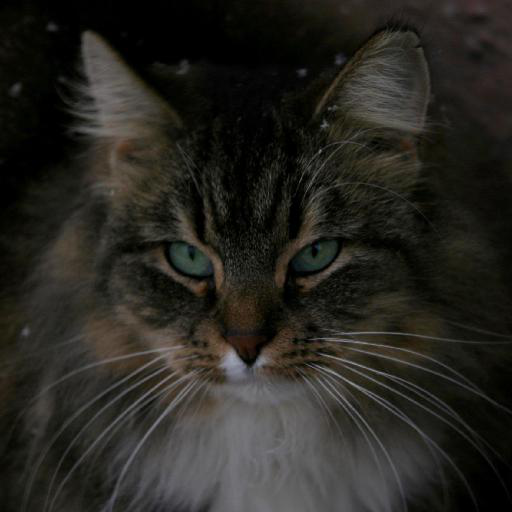

753 753
753 753
dataset saved in  d:\year 3\hk2\Machine Learning\testcode\DogCatWildRegcon\Cleaned_data.pt


In [4]:
transform = transforms.Compose([
    transforms.Resize((112, 112), interpolation=transforms.InterpolationMode.BICUBIC),
    # transforms.CenterCrop(299),
    # transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])
BASE_DIR = os.path.abspath(os.getcwd())
data = ImageDataset(os.path.join(BASE_DIR,"afhq"),transform=transform,maxdata=250)
# print(data.data[0].shape)
data.save_data(os.path.join(BASE_DIR,"Cleaned_data.pt"))

In [5]:
print(data.data.shape)
print(data.data[1])

(753, 2)
0       cat
1       cat
2       cat
3       cat
4       cat
       ... 
748    wild
749    wild
750    wild
751    wild
752    wild
Name: 1, Length: 753, dtype: object
